In [261]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns

In [262]:
iris = load_iris()

In [263]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [264]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [265]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [266]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [267]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [268]:
df.drop(columns=['sepal length (cm)', 'sepal width (cm)'], inplace=True)
df['Actual'] = iris['target']
df.head()

,petal length (cm),petal width (cm),Actual
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


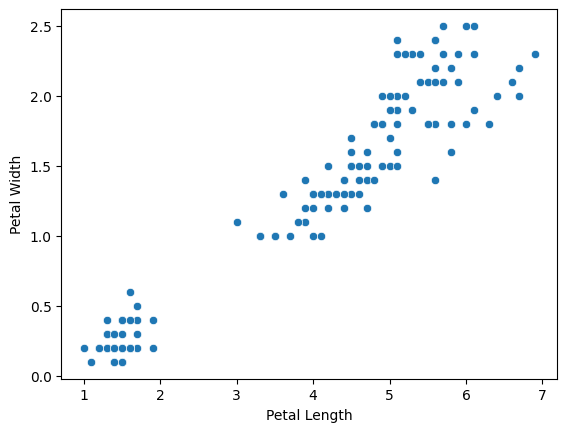

In [269]:
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [270]:
k_rng = range(1, 11)
sse = []

for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit_predict(df.drop(columns=['Actual']))
    sse.append(km.inertia_)

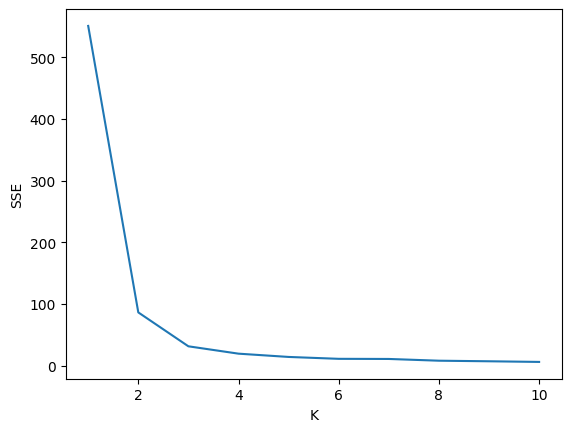

In [271]:
plt.plot(k_rng, sse)
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

In [272]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df.drop(columns=['Actual']))
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [273]:
df['Predicted'] = y_pred
df.head()

,petal length (cm),petal width (cm),Actual,Predicted
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1


In [274]:
cf = confusion_matrix(df['Actual'], df['Predicted'])

row_idx, col_idx = linear_sum_assignment(-cf)
mapping = dict(zip(col_idx, row_idx))
df['Predicted'] = [mapping[label] for label in df['Predicted']]

In [275]:
df.head()

,petal length (cm),petal width (cm),Actual,Predicted
0,1.4,0.2,0,0
1,1.4,0.2,0,0
2,1.3,0.2,0,0
3,1.5,0.2,0,0
4,1.4,0.2,0,0


In [276]:
accuracy_score(df['Actual'], df['Predicted'])

0.9466666666666667

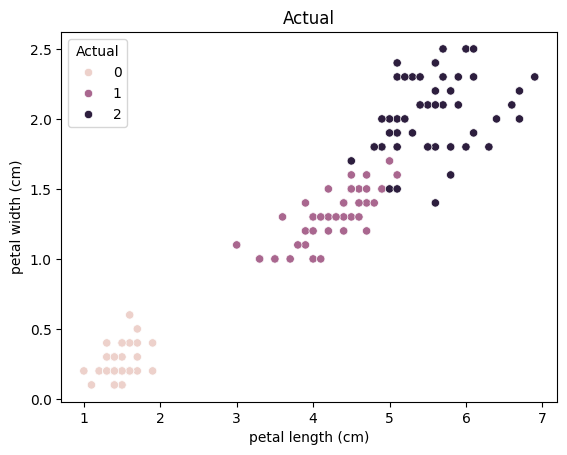

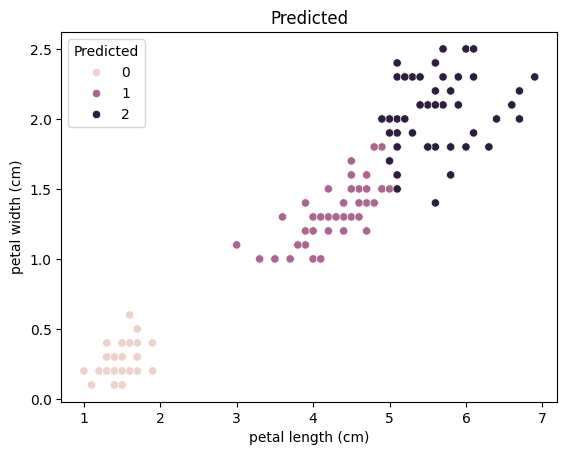

In [277]:
plt.figure()
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['Actual'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Actual')

plt.figure()
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['Predicted'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Predicted')

plt.show()